# Exercise 06
# TensorFlow and Keras \
## Made by: Juan Carlos Eraso & Carlos Quispe


---

In [0]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:


For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

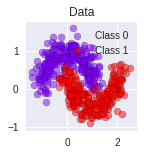

In [123]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(2, 2),)
plot_data(x_train, y_train)


In [0]:
import tensorflow as tf

sd=[[0,0],[1,1]]

In [0]:
#Variables
x = tf.placeholder(tf.float32,shape=[None,2])  
y_hidden = tf.placeholder(tf.float32,shape=[None,2])
y_true = tf.placeholder(tf.float32,shape=None)

def aleatorio ():
  r = np.random.uniform()
  return r


#WEIGHTS

#w = tf.Variable([[aleatorio(),aleatorio()]],dtype=tf.float32,name='weights')
w = tf.Variable(tf.random_uniform(shape=[1,2]),dtype=tf.float32,name='weights')
w_hidden = tf.Variable(tf.random_uniform(shape=[1,2]), dtype=tf.float32, name='hidden_weights')

#BIAS
b = tf.Variable([[0,0]], dtype=tf.float32 ,name='bias')
b_hidden = tf.Variable([[0,0]], dtype=tf.float32 ,name='bias_hidden')

#y_pred
y_pred = tf.matmul(w,tf.transpose(x)) + b
y_pred2 = tf.matmul(w_hidden,tf.transpose(y_pred)) + b_hidden


#LOSS FUNCTION
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
loss = tf.reduce_mean(loss)

#TRAIN
learning_rate = 1.0
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess.run(init)




In [0]:
#TRAIN
num_epochs = 50
losses = []

sess = tf.Session()
sess.run(init) 
for step in range(num_epochs):
  sess.run({x: x_train, y_true: y_train})
  
 #TEST
sess.run({x: x_test, y_true: y_test})
  

### graph

In [0]:
num_epochs = 50
losses = []


sess = tf.Session()
sess.run(init)      
for step in range(num_epochs):
  sess.run(train,{x: x_train, y_true: y_train})
  if (step % 5 == 0):
    losses.append(sess.run(loss, {x: X, y_true: Y}))
                       
pl.figure(figsize = (8,16/3))
pl.plot(losses)

<tf.Variable 'weights_51:0' shape=(1, 2) dtype=float32_ref>

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


In [0]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

%matplotlib inline

In [62]:
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

max_words = 1000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

Loading data...
8982 train sequences
2246 test sequences
46 classes


In [63]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [64]:
#MODEL
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_41 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_31 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_42 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_32 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [65]:


#Cofigure training task
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

#TRAINING
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)


#TESTING
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 183us/step - loss: 2.4542 - acc: 0.3630 - val_loss: 2.3069 - val_acc: 0.4260
Epoch 2/5
8083/8083 [==============================] - 1s 122us/step - loss: 2.1809 - acc: 0.4397 - val_loss: 2.1788 - val_acc: 0.4750
Epoch 3/5
8083/8083 [==============================] - 1s 115us/step - loss: 2.0693 - acc: 0.4876 - val_loss: 2.0863 - val_acc: 0.4905
Epoch 4/5
8083/8083 [==============================] - 1s 115us/step - loss: 1.9903 - acc: 0.5032 - val_loss: 2.0180 - val_acc: 0.5061
Epoch 5/5
2246/2246 [==============================] - 0s 46us/step
Test score: 1.9264659718116903
Test accuracy: 0.5258236865804117


# CONFIGURATION WITH THE BEST ACCURACY



#### After ttying different combiantions in the following cell



In [66]:

keras.initializers.Initializer()

In [84]:
#MODEL
ini = keras.initializers.identity

model = Sequential()
model.add(Dense(256, input_shape=(max_words,),kernel_initializer=keras.initializers.random_normal()))
model.add(Activation('selu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,kernel_initializer=keras.initializers.random_normal()))
model.add(Activation('softmax'))
model.summary(70)

#Cofigure training task
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(),metrics=['accuracy'])

#TRAINING
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size,  epochs=epochs,   verbose=1, validation_split=0.1)


#TESTING
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_70 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_56 (Activation)     (None, 256)                 0          
______________________________________________________________________
dropout_3 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_71 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_57 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

8083/8083 [==============================] - 1s 168us/step - loss: 0.5170 - acc: 0.8823 - val_loss: 0.9175 - val_acc: 0.7909
Epoch 4/5
8083/8083 [==============================] - 1s 168us/step - loss: 0.4118 - acc: 0.9037 - val_loss: 0.9140 - val_acc: 0.8053
Epoch 5/5
2246/2246 [==============================] - 0s 52us/step
Test score: 0.931067043187251
Test accuracy: 0.7947462155472882


#### The model wich has the highest accuracy was the one with:

**-activation function**: selu for both layers \
**-optimizer**: RMSprop. \
**-Use Dropout**: between hidden layer and output layer wiht 0.1 of parameter \
**-Kernel initializer**:  random normal by dafault for both layers \

## accuracy obtained: ALMOST 80%



selu